In [1]:
from autoencoder import *
import torch
from tqdm import tqdm

dataset = UTKFaceDataset()

encoder = Encoder(encoded_space_dim=256)
decoder = Decoder(encoded_space_dim=256)

encoder_weights = torch.load("models/encoder_256.pt", map_location=torch.device('cpu'))
decoder_weights = torch.load("models/decoder_256.pt", map_location=torch.device('cpu'))

encoder.load_state_dict(encoder_weights)
decoder.load_state_dict(decoder_weights)



100%|██████████| 23705/23705 [01:23<00:00, 282.29it/s] 


<All keys matched successfully>

In [17]:
from tqdm import tqdm

encoder.eval()
decoder.eval()
encoded_data = []
for x in tqdm(dataset.X):
    x = encoder(torch.tensor(x.clone(), dtype=torch.float32).unsqueeze(0)) / 255.0
    encoded_data.append(x.detach().squeeze(0).numpy())


  0%|          | 0/23705 [00:00<?, ?it/s]C:\Users\peter\AppData\Local\Temp\ipykernel_10200\4008994152.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = encoder(torch.tensor(x.clone(), dtype=torch.float32).unsqueeze(0)) / 255.0
100%|██████████| 23705/23705 [05:06<00:00, 77.26it/s]


In [10]:
encoded_X = np.stack(encoded_data)

np.save("encoded_data", encoded_X)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_X = pca.fit_transform(encoded_X)

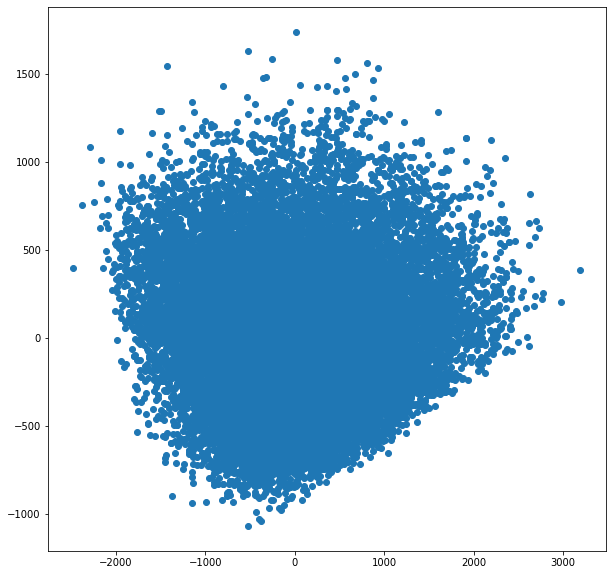

In [16]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(pca_X[:,0], pca_X[:,1])